### Imports

In [80]:
import numpy as np
import os
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                               
from tqdm import tqdm
import pandas as pd

### Paths

In [81]:
CURR_DIR_PATH = os.getcwd()

# Training paths
seg_train_path = CURR_DIR_PATH + "//data//seg_train//seg_train"

train_forest_path = seg_train_path + "//forest"
train_buildings_path = seg_train_path + "//buildings"
train_glacier_path = seg_train_path + "//glacier"
train_mountain_path = seg_train_path + "//mountain"
train_sea_path = seg_train_path + "//sea"
train_street_path = seg_train_path + "//street"

# Test paths
seg_test_path = CURR_DIR_PATH + "//data//seg_test//seg_test"

test_forest_path = seg_test_path + "//forest"
test_buildings_path = seg_test_path + "//buildings"
test_glacier_path = seg_test_path + "//glacier"
test_mountain_path = seg_test_path + "//mountain"
test_sea_path = seg_test_path + "//sea"
test_street_path = seg_test_path + "//street"

# Prediction path

seg_pred_path = CURR_DIR_PATH + "//data//seg_pred//seg_pred"

# Our path

seg_our_path = CURR_DIR_PATH + "//data//seg_our//seg_our"

Load cnn data

In [82]:
def load_data(paths):
    images = []
    labels = []
    label = -1
    for path in paths:
        label = label+1
        for file in tqdm(os.listdir(path)):
            image_path = os.path.join(path, file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(150, 150)) 
            image = image/ 255.0
            images.append(image)
            labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    output = (images,labels)
    return output

In [83]:
train_paths = [train_buildings_path, train_forest_path, train_glacier_path, train_mountain_path, train_sea_path, train_street_path]
test_paths = [test_buildings_path, test_forest_path, test_glacier_path, test_mountain_path, test_sea_path, test_street_path]
train_images, train_labels= load_data(train_paths)
print (f"Number of training images: {train_labels.shape[0]}")
test_images, test_labels = load_data(test_paths)
print (f"Number of testing images: {test_labels.shape[0]}")

100%|██████████| 2382/2382 [00:05<00:00, 435.97it/s]


Number of training images: 14034


100%|██████████| 501/501 [00:01<00:00, 434.00it/s]


Number of testing images: 3000


In [84]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

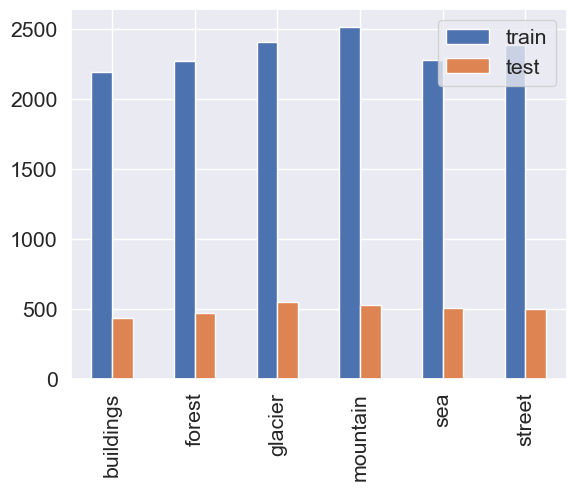

In [85]:
category_label=['buildings','forest', 'glacier','mountain','sea','street']
train_counts =[2191,2271,2404,2512,2274,2382]
test_counts = [437,474,553,525,510,501]
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=category_label
            ).plot.bar()
plt.show()

### Dataframe from train and test images

In [86]:
category_label=['buildings','forest', 'glacier','mountain','sea','street']
train_counts =[2191,2271,2404,2512,2274,2382]
test_counts = [437,474,553,525,510,501]
train_test_df = pd.DataFrame({'train': train_counts,
              'test': test_counts}, 
             index=category_label
            )
train_test_df

,train,test
buildings,2191,437
forest,2271,474
glacier,2404,553
mountain,2512,525
sea,2274,510
street,2382,501


train images

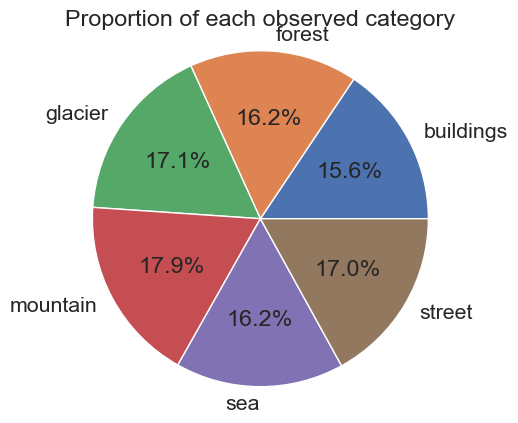

In [88]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=category_label,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

test images

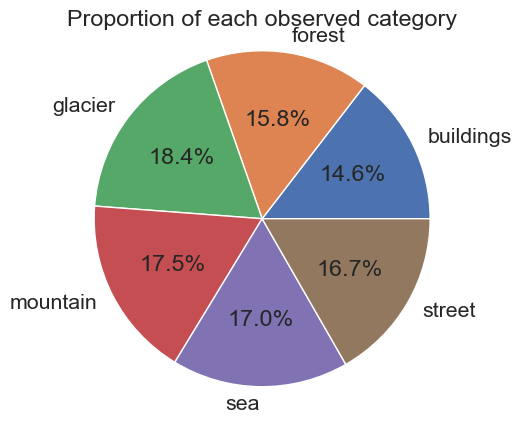

In [89]:
plt.pie(test_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=category_label,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [90]:
def display_random_image(category_label, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Image #{index} : {category_label[labels[index]]} ')
    plt.show()

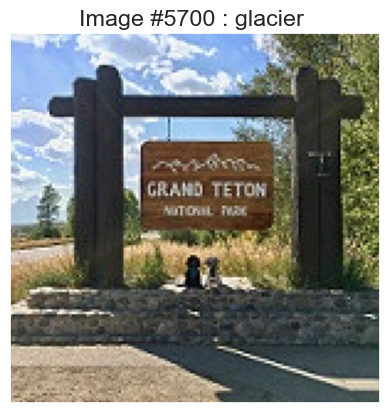

In [91]:
display_random_image(category_label, train_images, train_labels)

In [92]:
def display_examples(category_label, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(category_label[labels[i]])
    plt.show()

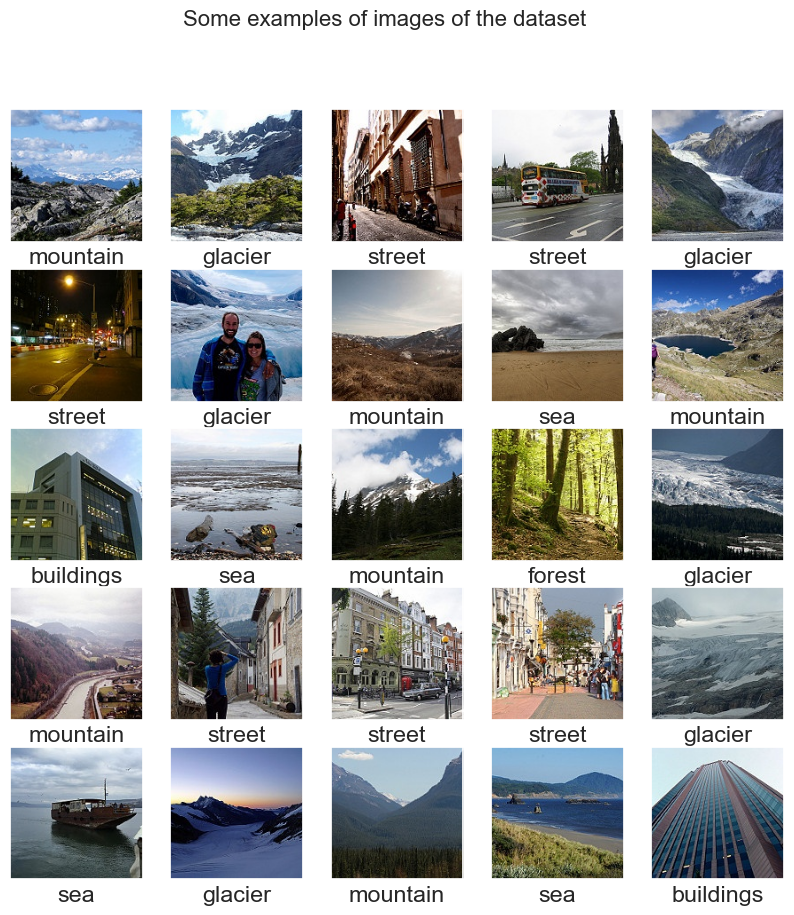

In [93]:
display_examples(category_label, train_images, train_labels)